In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [ ]:
filepath = 'MARCH 2022 BELGAUM.csv'
data = pd.read_csv(filepath)
data.head()

,YEAR,Date,Temperature,Min_Temperature,Max_Temperature,Humidity,Precipitation,Surface_Pressure,Wind_speed
0,2022,1,25.98,17.20,35.76,7.02,0.0,93.90,0.88
1,2022,2,25.94,16.80,35.94,6.41,0.0,93.85,1.62
2,2022,3,26.27,17.10,35.92,5.80,0.0,93.83,1.45
3,2022,4,26.23,17.44,36.04,6.53,0.0,93.85,1.44
4,2022,5,27.01,18.16,36.33,6.84,0.0,93.79,1.54


In [ ]:
data.shape
data.drop(['Surface_Pressure'], axis = 1, inplace = True)
data.head()

,YEAR,Date,Temperature,Min_Temperature,Max_Temperature,Humidity,Precipitation,Wind_speed
0,2022,1,25.98,17.20,35.76,7.02,0.0,0.88
1,2022,2,25.94,16.80,35.94,6.41,0.0,1.62
2,2022,3,26.27,17.10,35.92,5.80,0.0,1.45
3,2022,4,26.23,17.44,36.04,6.53,0.0,1.44
4,2022,5,27.01,18.16,36.33,6.84,0.0,1.54


In [ ]:
# missing columns 
data.isna().sum()

YEAR               0
Date               0
Temperature        0
Min_Temperature    0
Max_Temperature    0
Humidity           0
Precipitation      0
Wind_speed         0
dtype: int64

In [ ]:
data.describe()

,YEAR,Date,Temperature,Min_Temperature,Max_Temperature,Humidity,Precipitation,Wind_speed
count,31.0,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,2022.0,16.000000,27.772258,20.223548,36.988710,10.454839,0.399677,1.836774
std,0.0,9.092121,1.022845,1.656721,1.690136,2.730434,1.029856,0.367427
min,2022.0,1.000000,25.940000,16.800000,33.550000,5.800000,0.000000,0.880000
25%,2022.0,8.500000,26.960000,19.265000,35.910000,8.365000,0.000000,1.590000
50%,2022.0,16.000000,27.860000,20.940000,36.400000,10.860000,0.000000,1.880000
75%,2022.0,23.500000,28.600000,21.425000,38.245000,12.850000,0.065000,2.025000
max,2022.0,31.000000,29.230000,22.980000,40.350000,14.770000,4.880000,2.670000


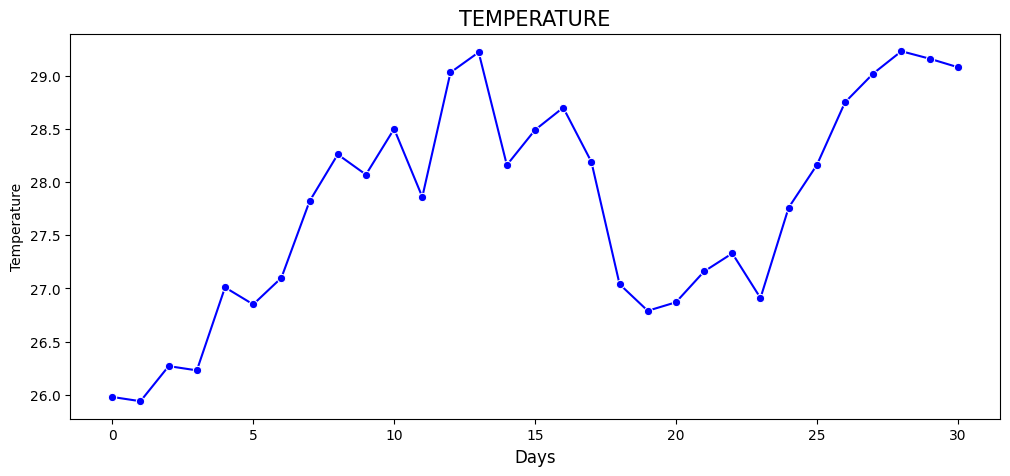

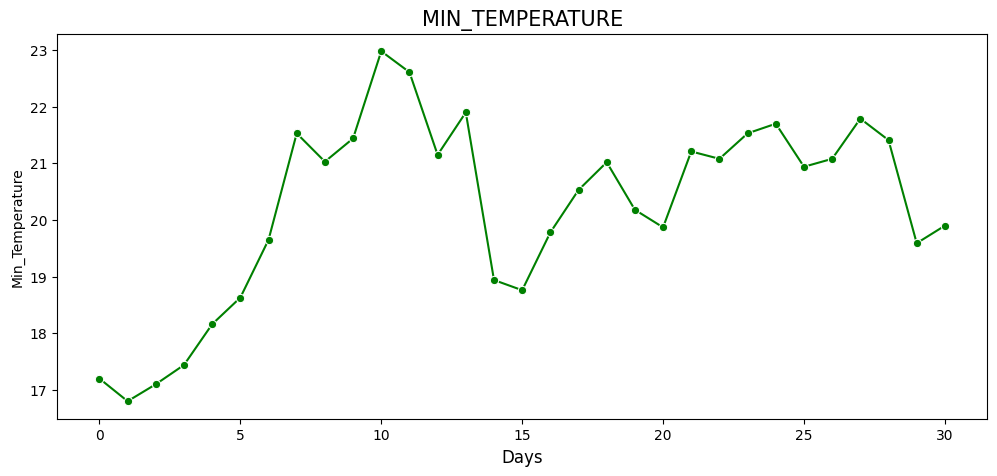

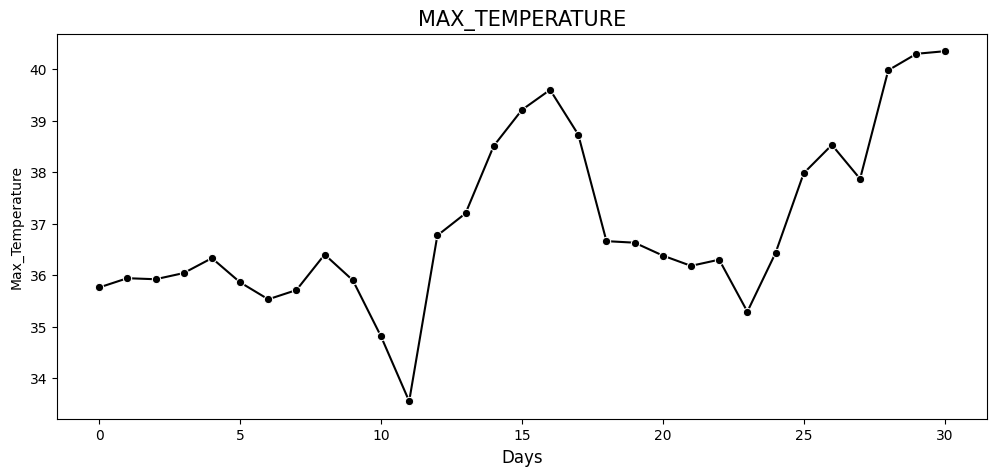

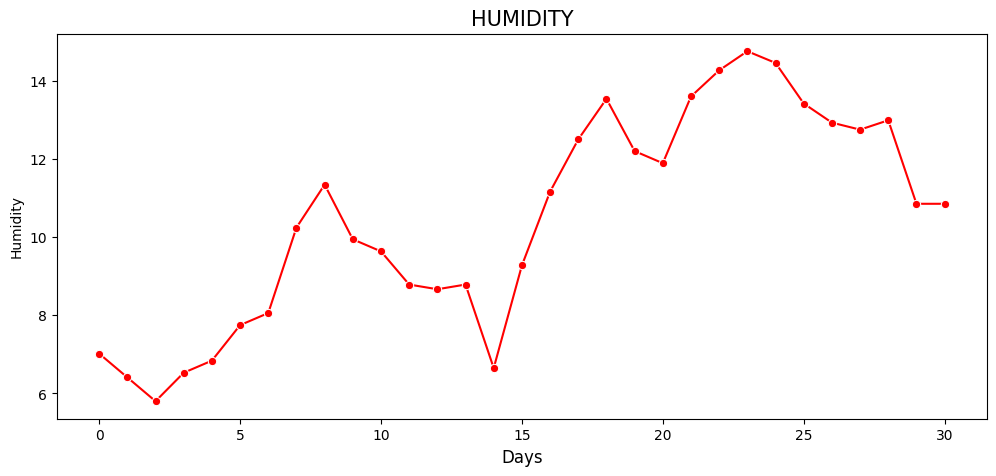

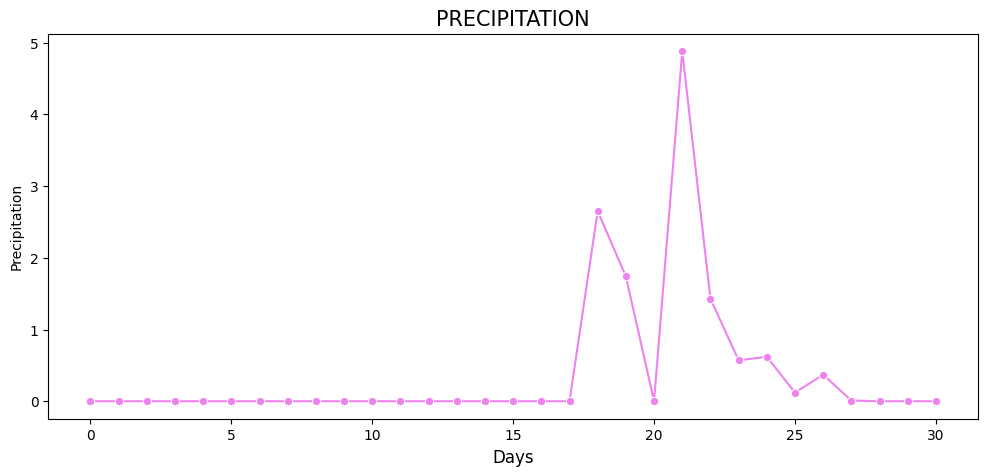

In [ ]:
# Plotting Weather Data
color={2:'blue',3:'green',4:'black',5:'red',6:'violet',7:'orange'}
for index in range(2,7):
    plt.figure(figsize=(12,5))
    plt.xlabel('Days', fontsize=12)
    plt.title('{}'.format(data.columns[index].upper()), fontsize=15)
    sns.lineplot(data=data.iloc[:,index], 
                 color=color[index], marker='o')
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


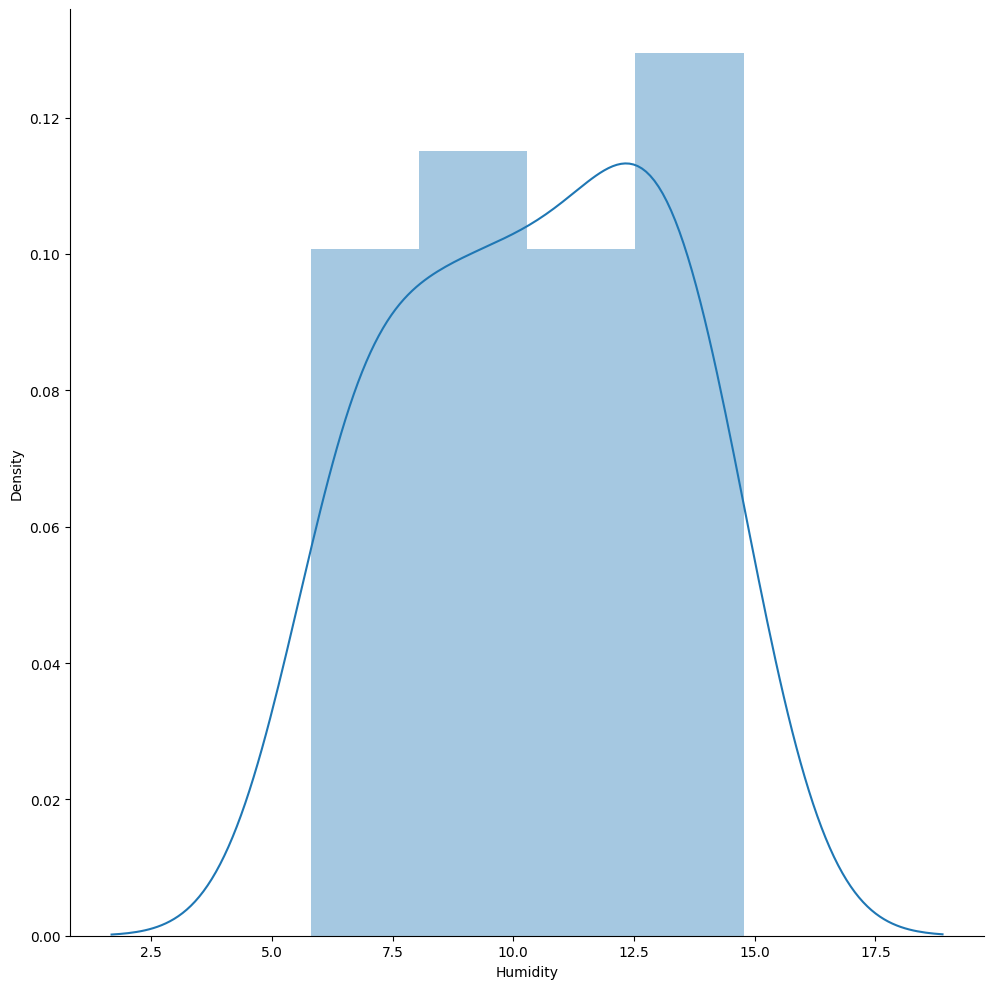

In [ ]:
# For Humidity
sns.FacetGrid(data, height=10).map(sns.distplot, "Humidity").add_legend()
plt.show()

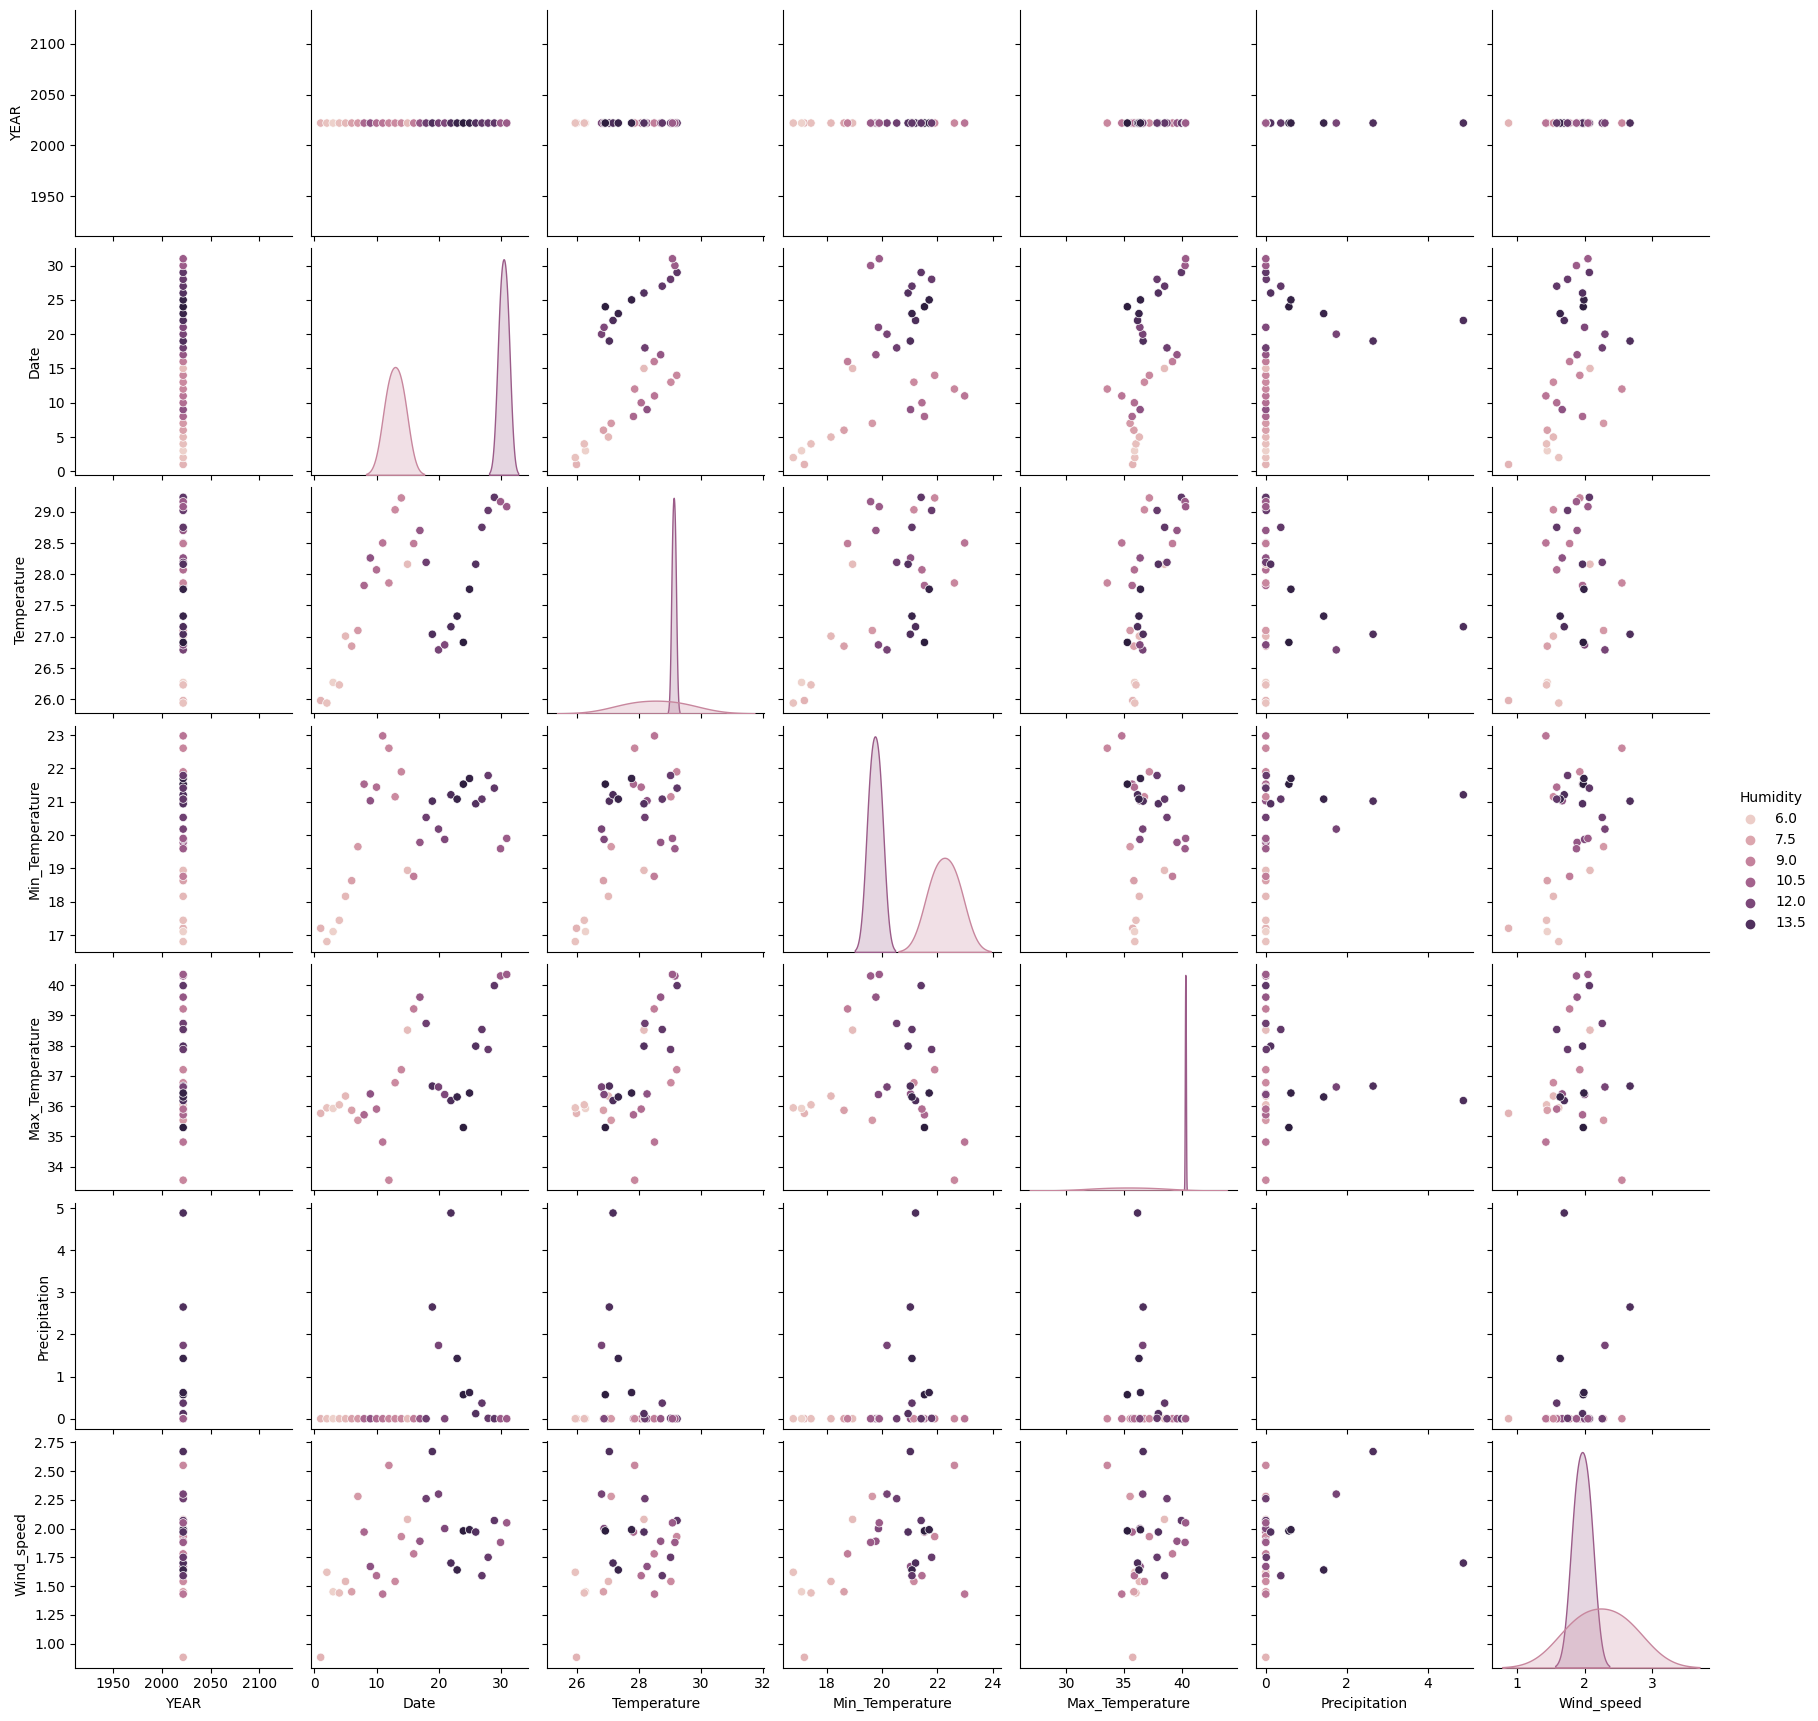

In [ ]:
sns.pairplot(data,hue="Humidity")

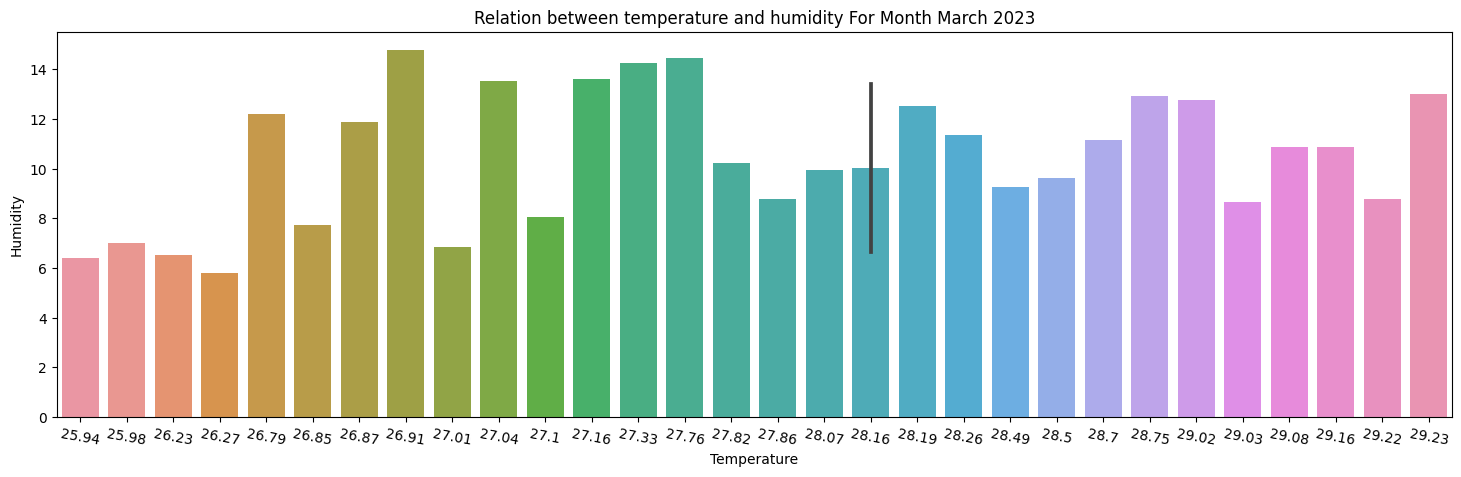

In [ ]:
plt.figure(figsize = (18,5))
sns.barplot(x='Temperature', y='Humidity',data=data)
plt.xticks(rotation=-10)
plt.title('Relation between temperature and humidity For Month March 2023')
plt.show()

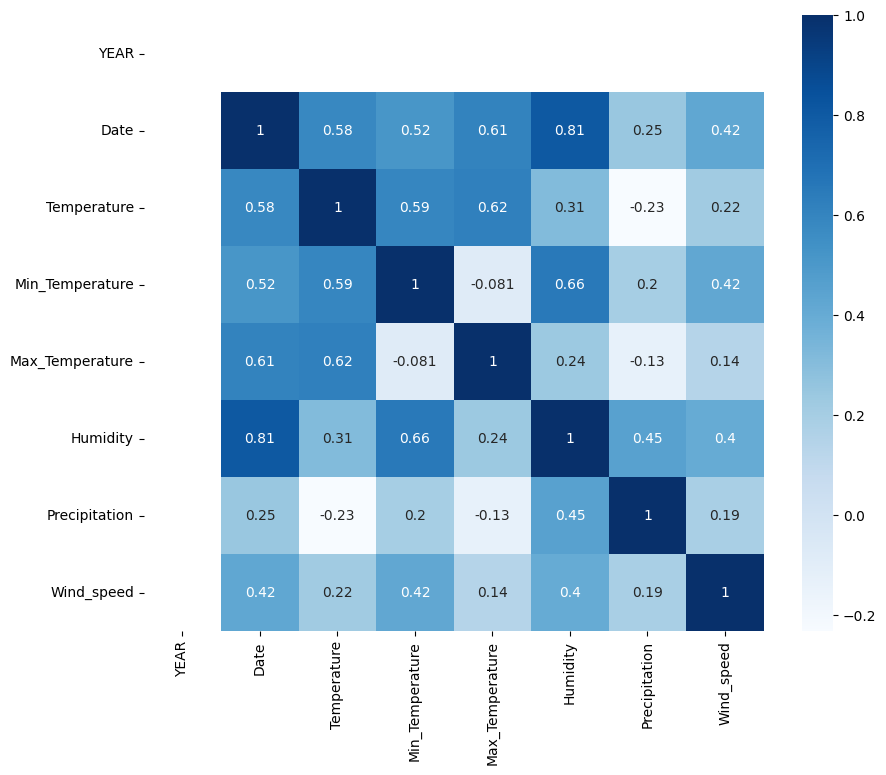

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data = data.corr(), annot = True, cmap = 'Blues')
plt.show()

<Axes: ylabel='Date'>

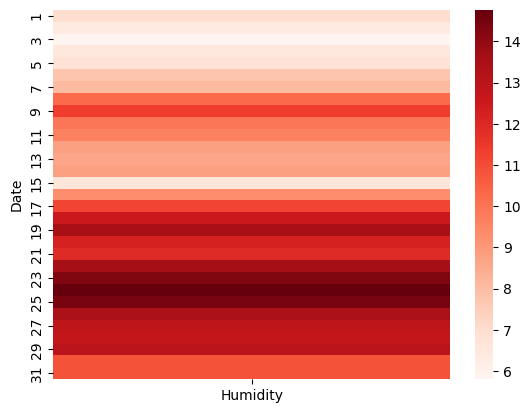

In [ ]:
humidity_table = pd.pivot_table(data, values='Humidity', index=['Date'])
sns.heatmap(data = humidity_table, cmap='Reds')

<Axes: ylabel='Date'>

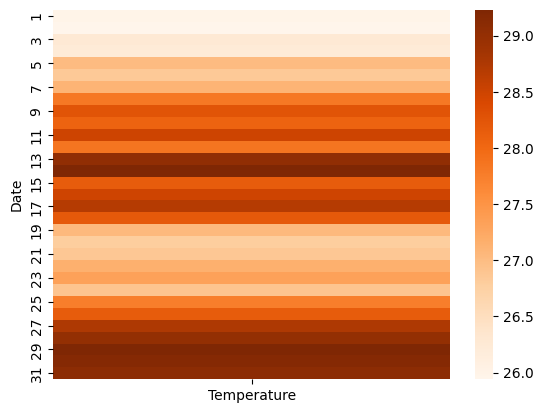

In [ ]:

Temperature_table = pd.pivot_table(data, values='Temperature', index=['Date'])
sns.heatmap(data = Temperature_table, cmap='Oranges')

In [ ]:
indices = ['Temperature', 'Humidity', 'Precipitation','Wind_speed']
ex_data = data.loc[:,indices]
ex_data

,Temperature,Humidity,Precipitation,Wind_speed
0,25.98,7.02,0.00,0.88
1,25.94,6.41,0.00,1.62
2,26.27,5.80,0.00,1.45
3,26.23,6.53,0.00,1.44
4,27.01,6.84,0.00,1.54
5,26.85,7.75,0.00,1.45
6,27.10,8.06,0.00,2.28
7,27.82,10.25,0.00,1.97
8,28.26,11.35,0.00,1.67
9,28.07,9.95,0.00,1.59


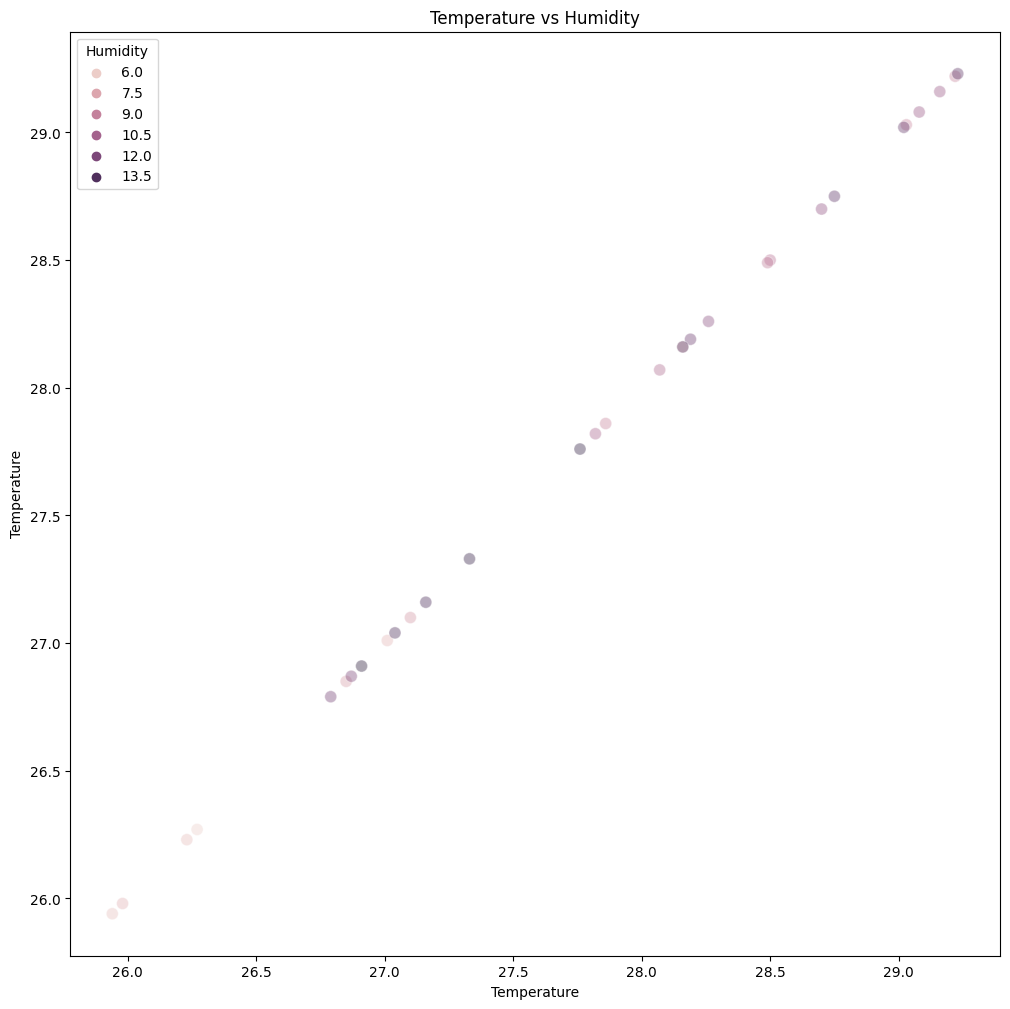

In [ ]:
#scatter plot for temperature and humidity by summary
plt.figure(figsize = (12,12))
plt.title('Temperature vs Humidity')
sns.scatterplot(x=ex_data.iloc[:,0], y=ex_data.iloc[:,0], hue= ex_data.iloc[:,1], s=75, alpha = 0.4)
plt.show()

In [ ]:
#Resampling the data days-wise by mean

indices = [2,3,4,5,6,7]
days = data.iloc[:,1] 

days.head()

0    1
1    2
2    3
3    4
4    5
Name: Date, dtype: int64

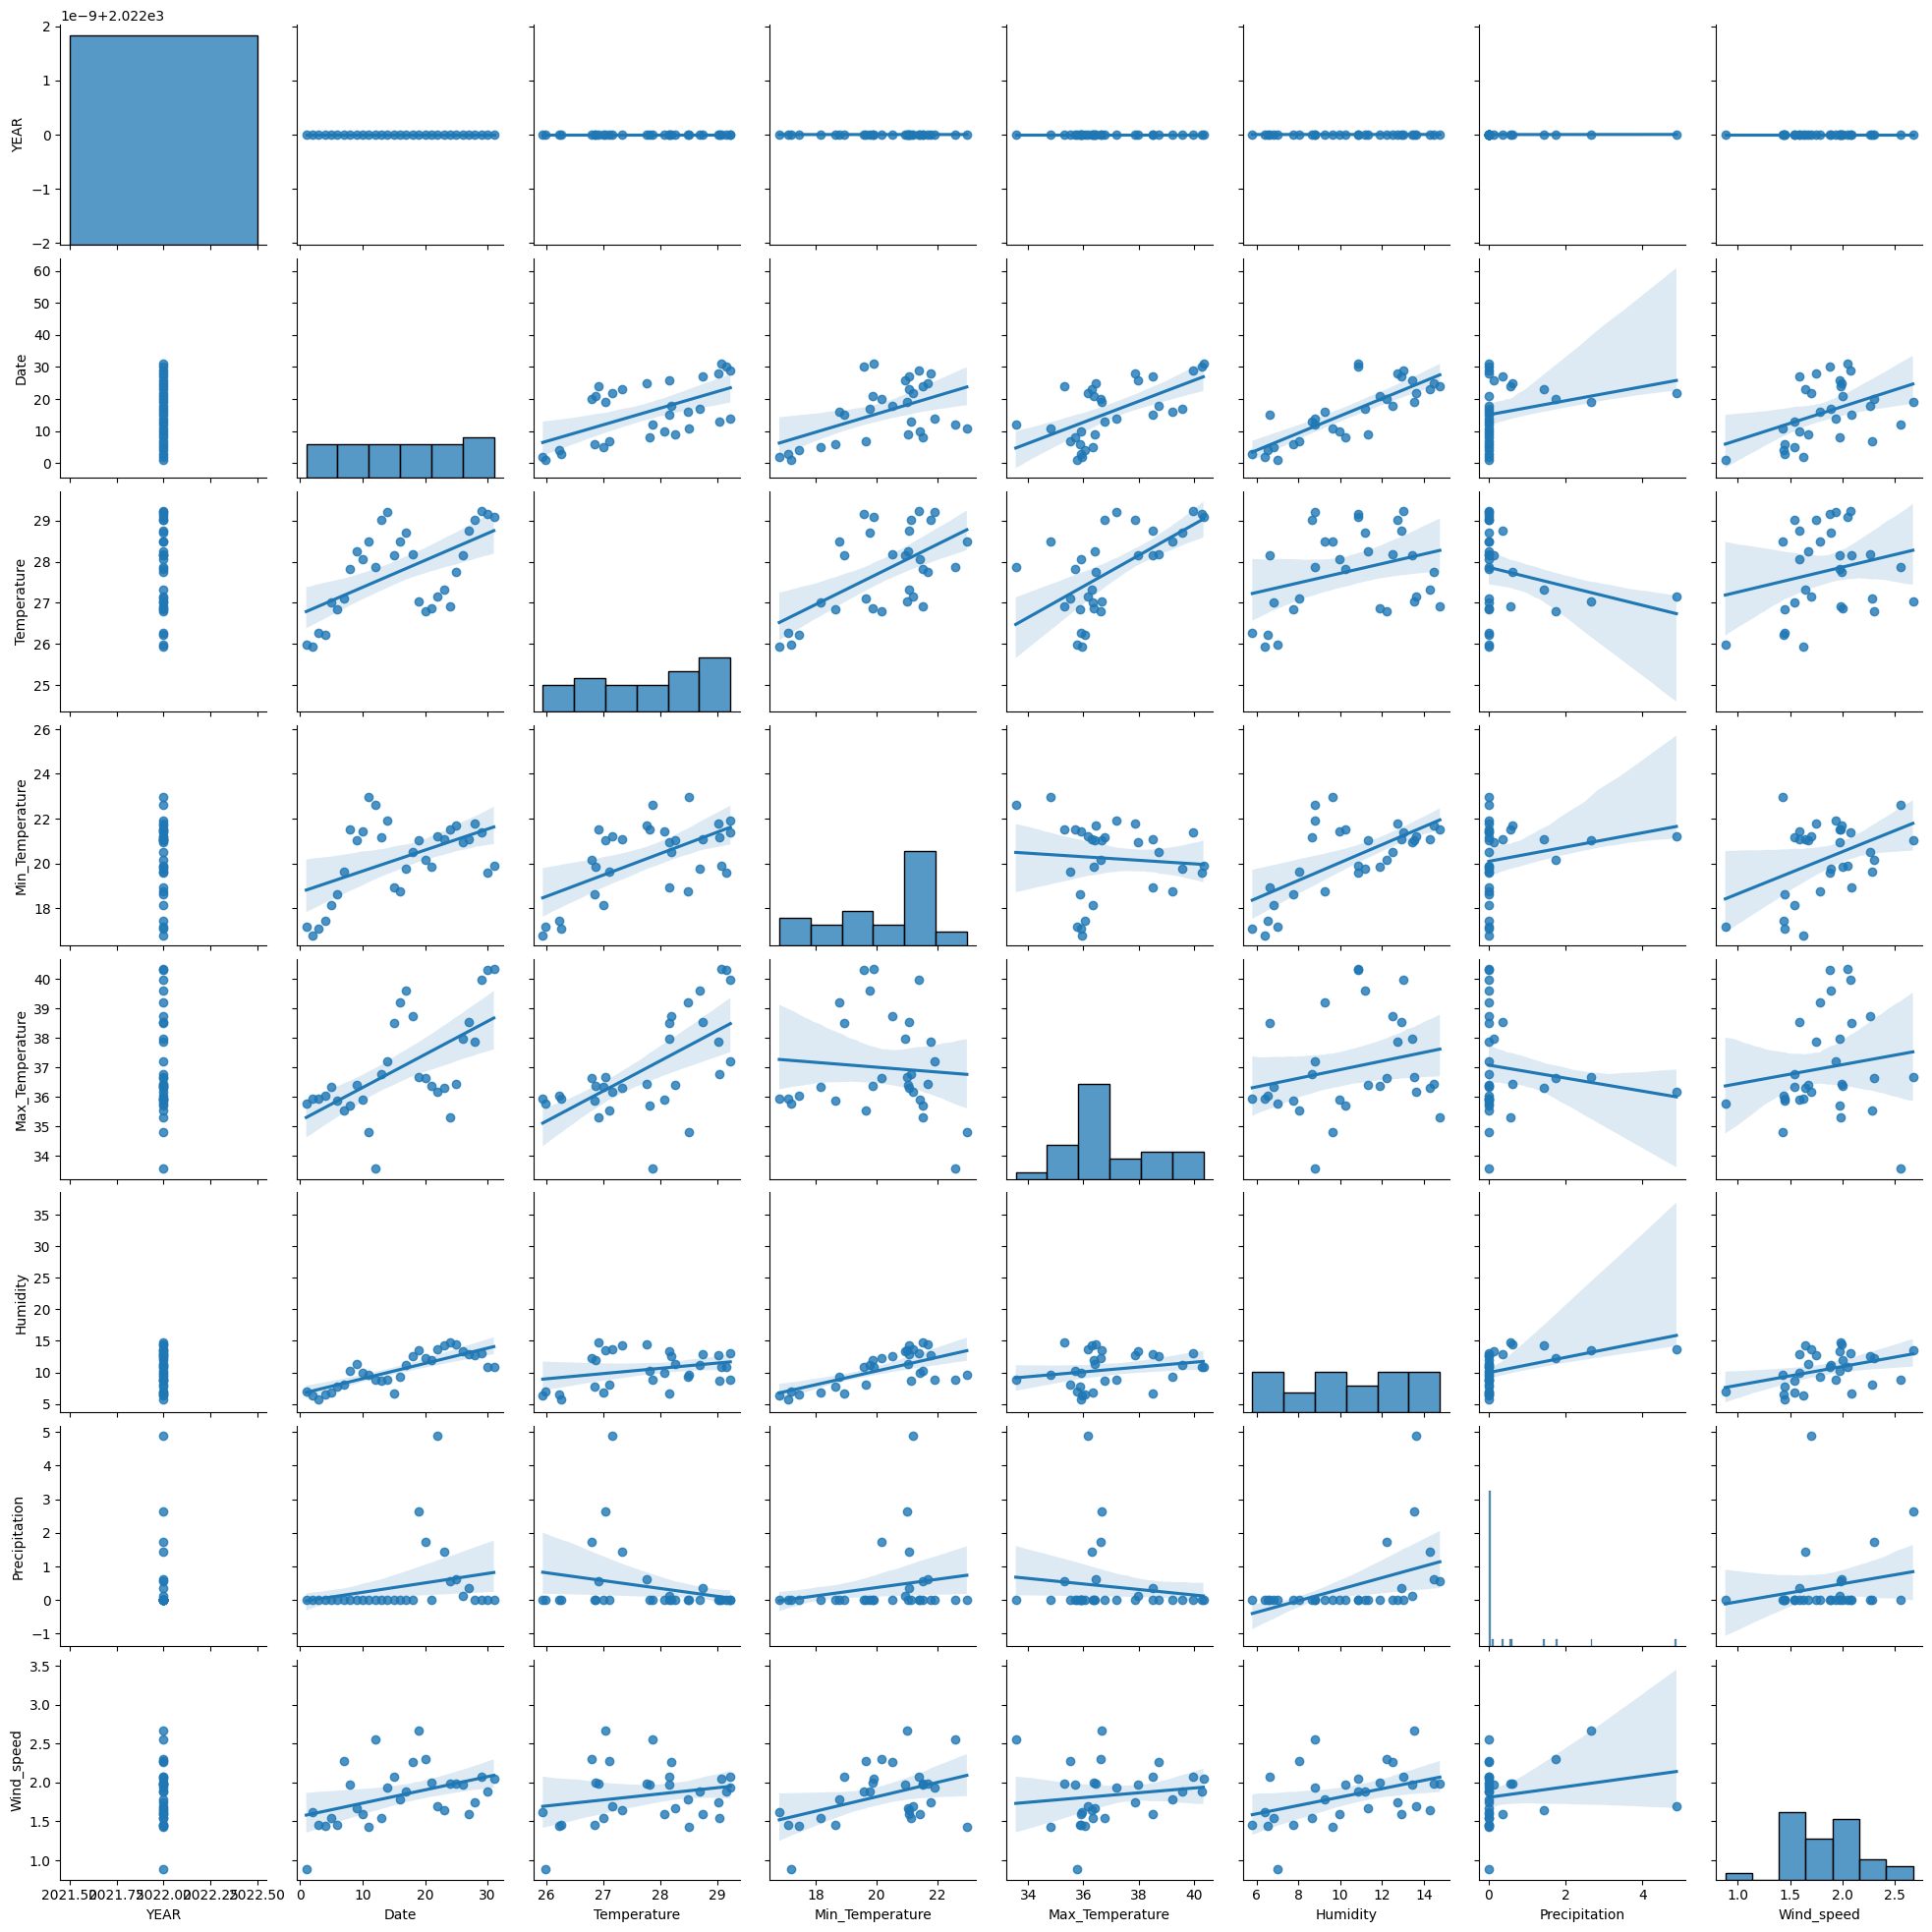

In [ ]:
# Pair plot for correlation
sns.pairplot(data, kind='reg')
plt.show()

In [ ]:
Temperature = data
normed_data = (Temperature  - Temperature.min()) / (Temperature.max() - Temperature.min())

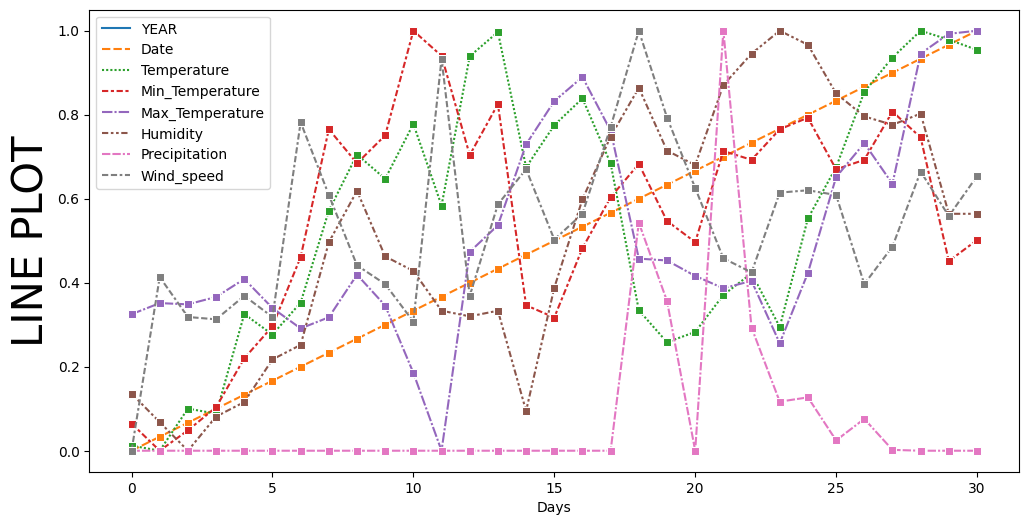

In [ ]:
#Line graph representation
plt.figure(figsize=(12,6))
plt.xlabel('Days')
plt.ylabel('LINE PLOT', fontsize=30)
sns.lineplot(data = normed_data, marker = 's')
plt.show()

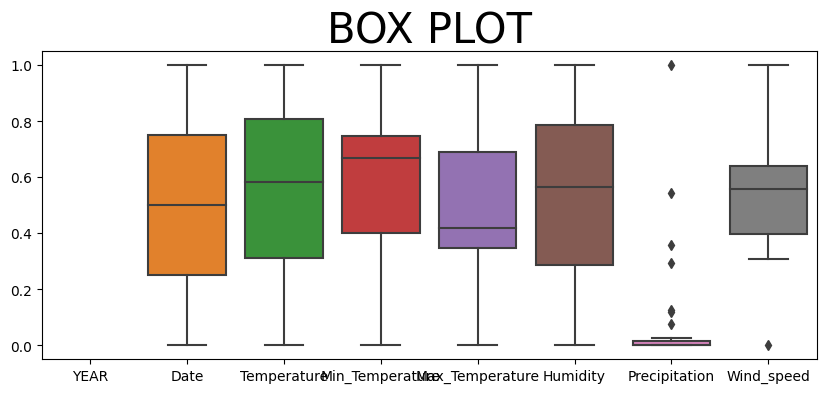

In [ ]:
#Box Plot
plt.figure(figsize = (10,4))
plt.title('BOX PLOT', fontsize=30)
sns.boxplot(data = normed_data)
plt.show()

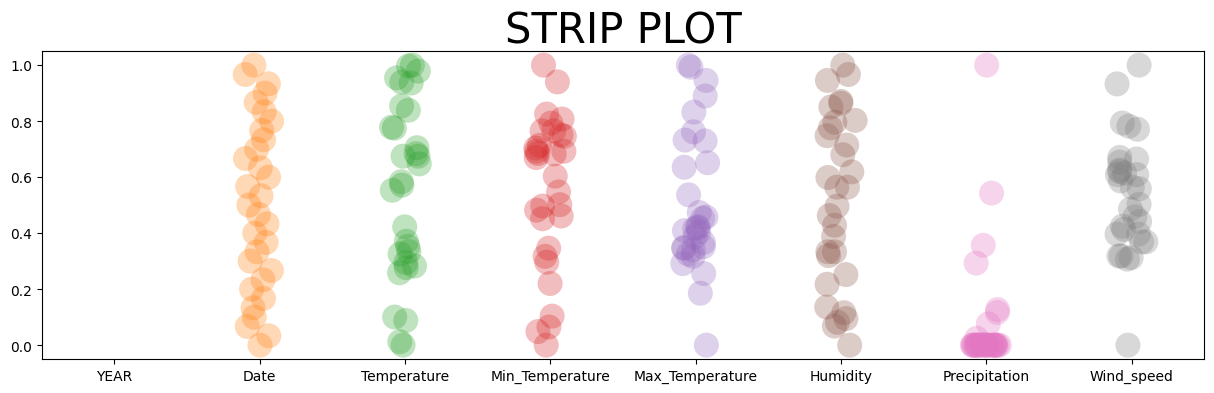

In [ ]:
#Strip Plot
plt.figure(figsize = (15,4))
plt.title('STRIP PLOT', fontsize=30)
sns.stripplot(data=normed_data, jitter= True, s =18, alpha = 0.3)
plt.show()